In [ ]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib.pyplot as plt


import cv2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
data_directory = 'Dataset\Test Dataset\Auto-WCEBleedGen Challenge Test Dataset\Test Dataset 1'
# os.listdir(data_directory)

In [ ]:
def get_data(data_dir):
    X = []
    name = []

    for image in os.listdir(data_dir):
        name.append(image)

        imagePath = os.path.join(data_dir, image)

        img = cv2.imread(imagePath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))

        X.append(np.array(img))

    return X, name

In [ ]:
X, name = get_data(data_directory)

In [ ]:
X = np.array(X)
X = X / 255
name = np.array(name)

In [ ]:
print(X.shape)
print(name.shape)

(49, 224, 224, 3)
(49,)


In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
# Define the CNN model
model = models.Sequential()

# Convolutional Layer 1 (C1)
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)))

# Max-Pooling Layer 1 (MP1)
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2 (C2)
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
# Max-Pooling Layer 2 (MP2)
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3 (C3)
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
# Max-Pooling Layer 3 (MP3)
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully Connected Layer 1 (FC1)
model.add(layers.Dense(64, activation = 'relu'))

# Fully Connected Layer 2 (FC2)
model.add(layers.Dense(2, activation = 'softmax'))


In [ ]:
model.load_weights('Weights.hdf5')

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
pred=model.predict(X)

2/2 [==============================] - 0s 87ms/step


In [ ]:
pred

array([[1.30668603e-04, 9.99869347e-01],
       [9.81029332e-01, 1.89706348e-02],
       [5.55938568e-05, 9.99944448e-01],
       [7.74507642e-01, 2.25492343e-01],
       [8.68290383e-03, 9.91317153e-01],
       [2.72328430e-03, 9.97276723e-01],
       [2.59567738e-01, 7.40432322e-01],
       [3.31653208e-01, 6.68346822e-01],
       [1.79721136e-03, 9.98202801e-01],
       [7.14984417e-01, 2.85015583e-01],
       [1.53798119e-05, 9.99984622e-01],
       [3.15856596e-05, 9.99968410e-01],
       [3.60931037e-03, 9.96390641e-01],
       [2.55686417e-03, 9.97443080e-01],
       [3.05935174e-01, 6.94064856e-01],
       [1.19317286e-01, 8.80682647e-01],
       [7.03891456e-01, 2.96108574e-01],
       [7.24783063e-01, 2.75216967e-01],
       [4.76066947e-01, 5.23933053e-01],
       [1.34802870e-02, 9.86519694e-01],
       [1.17696807e-01, 8.82303178e-01],
       [9.86191444e-04, 9.99013782e-01],
       [5.53867817e-01, 4.46132153e-01],
       [1.34045433e-03, 9.98659492e-01],
       [1.699877

In [ ]:
prediction = np.argmax(pred, axis = 1)

answer= []
for x in prediction:
    if x == 0:
        answer.append("Not Bleeding")
    else:
        answer.append("Bleeding")
answer

['Bleeding',
 'Not Bleeding',
 'Bleeding',
 'Not Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Not Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Not Bleeding',
 'Not Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Not Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding',
 'Bleeding']

In [ ]:
final = pd.DataFrame()
final['Image Name'] = name
final['Predicted Class Label'] = answer

In [ ]:
final.to_excel('Dataset 1.xlsx', index = False)

In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries


In [ ]:
def saveImage(idx):
    path = os.path.join(data_directory, name[idx])
    print(path)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))

    explainer = lime_image.LimeImageExplainer()

    explanation = explainer.explain_instance(X[idx], model.predict, top_labels=5, hide_color=0, num_samples=1000)

    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

    final_image = mark_boundaries(temp, mask)

    plt.imshow(final_image)
    output_path = "Final Output/Test-1"
    output_path = os.path.join(output_path, name[idx])
    plt.savefig(output_path)

Dataset\Test Dataset\Auto-WCEBleedGen Challenge Test Dataset\Test Dataset 1\A0000.png


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 65ms/step
Dataset\Test Dataset\Auto-WCEBleedGen Challenge Test Dataset\Test Dataset 1\A0012.png


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 62ms/step
Dataset\Test Dataset\Auto-WCEBleedGen Challenge Test Dataset\Test Dataset 1\A0025.png


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 85ms/step
Dataset\Test Dataset\Auto-WCEBleedGen Challenge Test Dataset\Test Dataset 1\A0037.png


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step
Dataset\Test Dataset\Auto-WCEBleedGen Challenge Test Dataset\Test Dataset 1\A0049.png


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 81ms/step


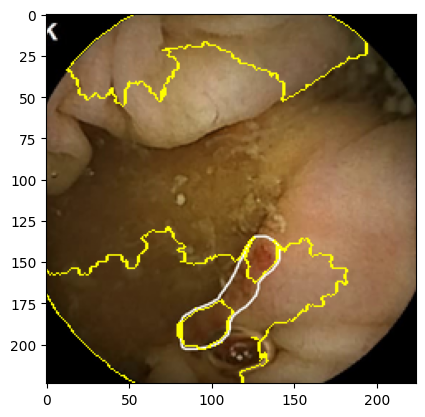

In [ ]:
for i in range(0, X.shape[0], X.shape[0] // 4):
    saveImage(i)